## Creating CNN Using Scratch And Transfer Learning

In [44]:
# import the libraries as shown below

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import scipy
from glob import glob
import matplotlib.pyplot as plt

In [45]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'


In [46]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [47]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [48]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [49]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [50]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [51]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [52]:

# view the structure of the model
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [53]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 28, 28, 64)       

In [54]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [55]:
# Use the Image Data Generator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [56]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [57]:
training_set

In [58]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [59]:
# fit the model
# Run the cell. It will take some time to execute

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 35s 2s/step - loss: 0.8941 - accuracy: 0.5841 - val_loss: 0.7875 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 35s 3s/step - loss: 0.6114 - accuracy: 0.6803 - val_loss: 0.7170 - val_accuracy: 0.6791
Epoch 3/50
13/13 [==============================] - 35s 3s/step - loss: 0.5069 - accuracy: 0.7284 - val_loss: 0.7957 - val_accuracy: 0.4403
Epoch 4/50
13/13 [==============================] - 26s 2s/step - loss: 0.3678 - accuracy: 0.8341 - val_loss: 0.7606 - val_accuracy: 0.5448
Epoch 5/50
13/13 [==============================] - 27s 2s/step - loss: 0.2977 - accuracy: 0.8726 - val_loss: 0.5311 - val_accuracy: 0.7090
Epoch 6/50
13/13 [==============================] - 25s 2s/step - loss: 0.2808 - accuracy: 0.8966 - val_loss: 0.7379 - val_accuracy: 0.6194
Epoch 7/50
13/13 [==============================] - 23s 2s/step - loss: 0.2170 - accuracy: 0.9255 - val_loss: 0.4262 - val_accuracy: 0.8060
Epoch 8/50
13/13 [==

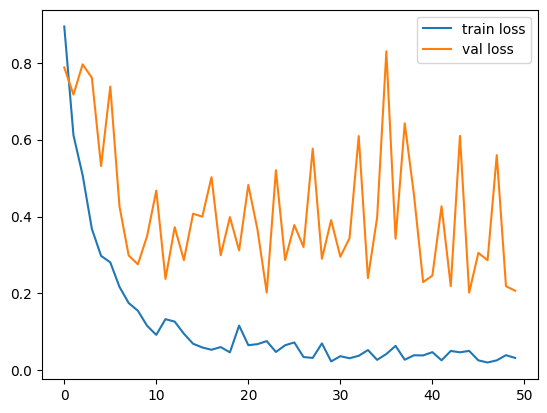

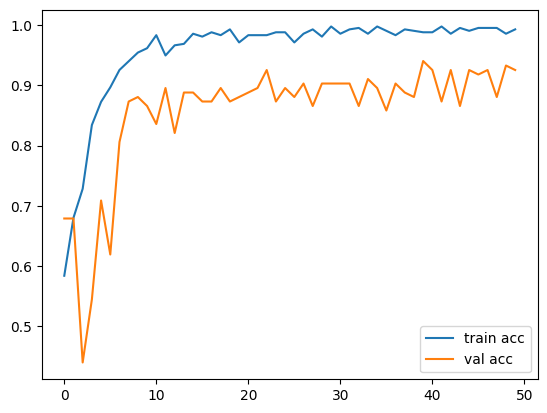

<Figure size 640x480 with 0 Axes>

In [60]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [61]:
# save it as a h5 file

model.save('model_vgg19.h5')

c:\Users\aarun\ML_Deployments\Disease_Detection-Malaria\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [62]:

y_pred = model.predict(test_set)


5/5 [==============================] - 3s 334ms/step


In [63]:
y_pred

array([[1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.91339912e-08],
       [1.00000000e+00, 2.06146811e-09],
       [1.00000000e+00, 1.41513271e-19],
       [2.46999483e-03, 9.97530043e-01],
       [1.00000000e+00, 1.31471802e-08],
       [1.00000000e+00, 6.04041439e-09],
       [6.65935688e-03, 9.93340671e-01],
       [9.99999881e-01, 1.63300768e-07],
       [1.00000000e+00, 7.47645695e-11],
       [1.00000000e+00, 2.06008579e-08],
       [9.83500600e-01, 1.64993983e-02],
       [1.00000000e+00, 4.04879817e-27],
       [1.47833652e-03, 9.98521626e-01],
       [5.92329015e-04, 9.99407649e-01],
       [1.00000000e+00, 1.24125449e-36],
       [9.99999881e-01, 1.27366633e-07],
       [1.00000000e+00, 2.43340981e-12],
       [1.00000000e+00, 1.08077078e-12],
       [5.75075112e-03, 9.94249225e-01],
       [9.99996424e-01, 3.54871440e-06],
       [1.00000000e+00, 3.39092171e-19],
       [9.99999881e-01, 9.46151033e-08],
       [4.89241630e-03, 9.95107651e-01],
       [1.000000

In [64]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [65]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [66]:
model=load_model('model_vgg19.h5')

In [74]:
img=image.load_img('Dataset/Test/Uninfected/3.png',target_size=(224,224))



In [75]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [76]:
x.shape

(224, 224, 3)

In [77]:
x=x/255

In [78]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [79]:
model.predict(img_data)

1/1 [==============================] - 0s 112ms/step


array([[0., 1.]], dtype=float32)

In [80]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 112ms/step


In [81]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
